<a href="https://colab.research.google.com/github/raa18-git/ruchi/blob/main/ml_ann_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 24.27200605424405
Epoch 100, Loss: 14.362056282418513
Epoch 200, Loss: 13.949278877193406
Epoch 300, Loss: 7.550434844666793
Epoch 400, Loss: 8.976007681648657
Epoch 500, Loss: 8.765470555860492
Epoch 600, Loss: 8.674190743179231
Epoch 700, Loss: 8.627916570291712
Epoch 800, Loss: 8.601296482456359
Epoch 900, Loss: 8.585610310267707


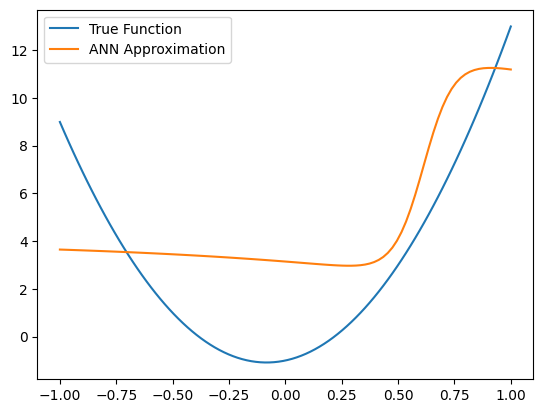

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target function
def target_function(x):
    return 12 * x**2 - 1 + 2 * x - x**2 / 100

# Define activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Define the ANN class
class ANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.1
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.1
        self.bias_output = np.zeros((1, output_size))

    def forward(self, x):
        # Input to hidden layer
        self.hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        # Hidden to output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.output_input  # No activation on the output layer (regression task)

        return self.output

    def backward(self, x, y, output):
        # Output layer error
        output_error = output - y
        output_delta = output_error  # No activation derivative for output layer

        # Hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_input)

        # Gradient descent weight and bias updates
        self.weights_hidden_output -= self.learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output -= self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)

        self.weights_input_hidden -= self.learning_rate * np.dot(x.T, hidden_delta)
        self.bias_hidden -= self.learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    def train(self, x, y, epochs=1000):
        for epoch in range(epochs):
            output = self.forward(x)
            self.backward(x, y, output)
            if epoch % 100 == 0:
                loss = np.mean((y - output) ** 2)
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, x):
        return self.forward(x)

# Generate training data
x_values = np.linspace(-1, 1, 100).reshape(-1, 1)
y_values = target_function(x_values)

# Initialize and train the network
input_size = 1
hidden_size = 10  # Number of neurons in the hidden layer, can be tuned
output_size = 1
learning_rate = 0.01

ann = ANN(input_size, hidden_size, output_size, learning_rate)
ann.train(x_values, y_values, epochs=1000)

# Plotting the results
predicted_y = ann.predict(x_values)
plt.plot(x_values, y_values, label="True Function")
plt.plot(x_values, predicted_y, label="ANN Approximation")
plt.legend()
plt.show()


In [ ]:
A = [
    [-4, 1, 0],
    [0, -2, 1],
    [0, 0, -1]
]

C=[1,0,0]



In [ ]:
import numpy as np

# Define matrices A and C
A = np.array([
    [-4, 1, 0],
    [0, -2, 1],
    [0, 0, -1]
])

C = np.array([[1, 0, 0]])

# Construct the observability matrix
observability_matrix = np.vstack([C, np.dot(C, A), np.dot(C, np.dot(A, A))])

# Calculate the rank of the observability matrix
rank_observability = np.linalg.matrix_rank(observability_matrix)

# Check if the system is observable
if rank_observability == A.shape[0]:
    print("The system is observable.")
else:
    print("The system is not observable.")

# Optional: print the observability matrix and its rank
print("Observability Matrix:\n", observability_matrix)
print("Rank of Observability Matrix:", rank_observability)


The system is observable.
Observability Matrix:
 [[ 1  0  0]
 [-4  1  0]
 [16 -6  1]]
Rank of Observability Matrix: 3


In [ ]:
import numpy as np

# Define the observability matrix
O = np.array([
    [1, 0, 0],
    [-4, 1, 0],
    [16, -6, 1]
])

# Compute the Moore-Penrose pseudoinverse of O
O_pseudo_inverse = np.linalg.pinv(O)

# Display the pseudoinverse
print("Moore-Penrose Pseudoinverse (O^†):\n", O_pseudo_inverse)


Moore-Penrose Pseudoinverse (O^†):
 [[ 1.00000000e+00 -1.62411504e-16 -4.72325594e-17]
 [ 4.00000000e+00  1.00000000e+00 -2.68748892e-16]
 [ 8.00000000e+00  6.00000000e+00  1.00000000e+00]]


In [ ]:
import numpy as np

# Define the observability matrix
Ac = np.array([
    [-12, 1, 0],
    [-25, 0, 1],
    [-30, 0, 0]
])

# Compute the Moore-Penrose pseudoinverse of O
O_pseudo_inverse = np.linalg.pinv(O)

# Display the pseudoinverse
print("Moore-Penrose Pseudoinverse (O^†):\n", O_pseudo_inverse)


In [ ]:
import numpy as np
from sympy import symbols, Matrix

# Define matrix A
A = Matrix([
    [-4, 1, 0],
    [0, -2, 1],
    [0, 0, -1]
])

# Define the variable for the polynomial
s = symbols('s')

# Calculate the characteristic polynomial
char_poly = A.charpoly(s)

# Display the characteristic polynomial
print("Characteristic Polynomial:")
print(char_poly.as_expr())


Characteristic Polynomial:
s**3 + 7*s**2 + 14*s + 8
